# Práctica 5 : Support Vector Machines

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Support Vector Machines

In [12]:
def cargaDatos(file = 'ex6data1.mat'):
    m = loadmat(file)
    X = m['X']
    y = m['y'].ravel()
    return X, y

In [27]:
def cargaDatos2(file = 'ex6data1.mat'):
    m = loadmat(file)
    X = m['X']
    y = m['y'].ravel()
    x_val = m['Xval']
    y_val = m['yval'].ravel()
    return X, y, x_val, y_val

In [11]:
def draw_graph(file_name, labels = ['y = 1', 'y = 0']):
    X, Y = cargaDatos(file_name)
    
    # Obtiene un vector con los índices de los ejemplos positivos
    pos = np.where (Y == 1)
    posn = np.where (Y == 0)

    # Dibuja los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = labels[0])
    plt.scatter(X[posn, 0], X[posn, 1], marker='o', c='y', label = labels[1])
    plt.legend(loc='upper right')
    plt.show()

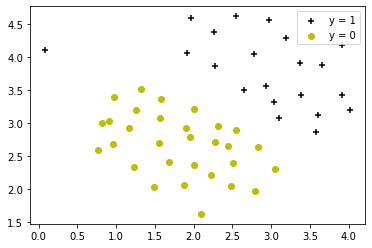

In [22]:
draw_graph("ex6data1.mat")

## Kernel lineal

In [42]:
def frontera(X, Y, svm, C):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    
    predict = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    
    pos = (y == 1).ravel() 
    posn = (y == 0).ravel() 
    plt.figure() 
    plt.scatter(X[pos, 0], X[pos, 1], color='k', marker='+') 
    plt.scatter(X[posn, 0], X[posn, 1], color='y', edgecolors='k', marker='o') 
    plt.contour(x1, x2, predict) 
    plt.show()

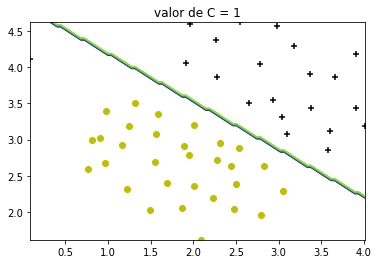

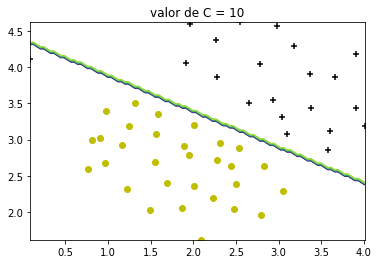

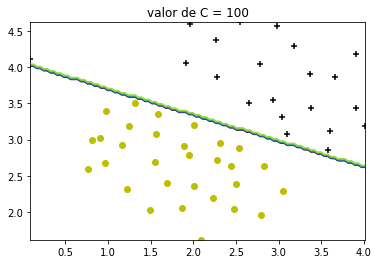

In [26]:
X, y = cargaDatos(file = 'ex6data1.mat')

Cs = [1 , 10, 100]

for C in Cs:
    svm = SVC(kernel = 'linear', C = C)
    svm.fit(X,y)
    frontera(X, y, 'ex6data1.mat', svm, C)

## Kernel gaussiano

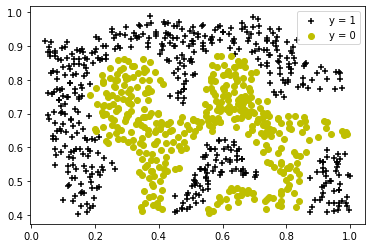

In [23]:
draw_graph("ex6data2.mat")

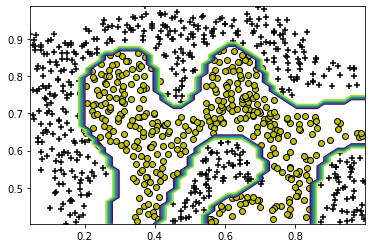

In [43]:
X, y = cargaDatos(file = 'ex6data2.mat')

C = 1
sigma = 0.1

svm = SVC(kernel = 'rbf', C=C, gamma = 1/(2*sigma**2))
svm.fit(X,y)
frontera(X, y, svm, C)

## Elección de los parámetros C y sigma

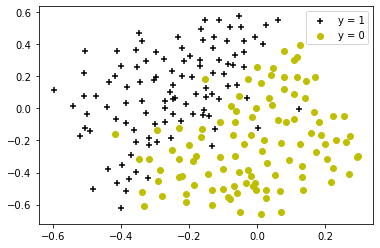

In [25]:
draw_graph("ex6data3.mat")

C = 0.01 y sigma = 0.01 0.435
C = 0.01 y sigma = 0.03 0.435
C = 0.01 y sigma = 0.1 0.435
C = 0.01 y sigma = 0.3 0.435
C = 0.01 y sigma = 1 0.435
C = 0.01 y sigma = 3 0.435
C = 0.01 y sigma = 10 0.435
C = 0.01 y sigma = 30 0.435
C = 0.03 y sigma = 0.01 0.435
C = 0.03 y sigma = 0.03 0.435
C = 0.03 y sigma = 0.1 0.45
C = 0.03 y sigma = 0.3 0.86
C = 0.03 y sigma = 1 0.62
C = 0.03 y sigma = 3 0.435
C = 0.03 y sigma = 10 0.435
C = 0.03 y sigma = 30 0.435
C = 0.1 y sigma = 0.01 0.435
C = 0.1 y sigma = 0.03 0.435
C = 0.1 y sigma = 0.1 0.945
C = 0.1 y sigma = 0.3 0.91
C = 0.1 y sigma = 1 0.825
C = 0.1 y sigma = 3 0.435
C = 0.1 y sigma = 10 0.435
C = 0.1 y sigma = 30 0.435
C = 0.3 y sigma = 0.01 0.435
C = 0.3 y sigma = 0.03 0.755
C = 0.3 y sigma = 0.1 0.96
C = 0.3 y sigma = 0.3 0.925
C = 0.3 y sigma = 1 0.89
C = 0.3 y sigma = 3 0.74
C = 0.3 y sigma = 10 0.435
C = 0.3 y sigma = 30 0.435
C = 1 y sigma = 0.01 0.605
C = 1 y sigma = 0.03 0.905
C = 1 y sigma = 0.1 0.965
C = 1 y sigma = 0.3 0.965
C = 1

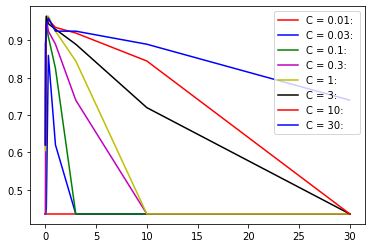

In [40]:
X, y, x_val, y_val = cargaDatos2(file = 'ex6data3.mat')

valores = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
c = ['r', 'b' , 'g', 'm', 'y', 'k', 'r', 'b']

i = 0

for C in valores:
    a = []
    
    for sigma in valores:
        svm = SVC(kernel = 'rbf', C = C , gamma = 1/(2*sigma**2))
        svm.fit(X,y)
        a.append(accuracy_score(y_val, svm.predict(x_val)))
        print('C = {} y sigma = {}'.format(C,sigma), accuracy_score(y_val, svm.predict(x_val)))
    plt.plot(valores, a, c[i], label = 'C = {}: '.format(C))
    i = i+1

plt.legend()
plt.show()

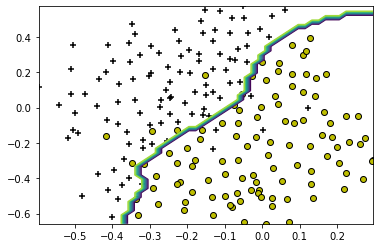

In [45]:
X, y, x_val, y_val = cargaDatos2(file = 'ex6data3.mat')

C = 1 
sigma = 0.1
svm = SVC(kernel = 'rbf', C = C , gamma = 1/(2*sigma**2))
svm.fit(X,y)
frontera(X, y, svm, C)

# Detección de spam

In [57]:
from process_email import email2TokenList
from get_vocab_dict import getVocabDict
import codecs

In [106]:
email_contents = codecs.open('spam/0001.txt','r', encoding= 'utf', errors= 'ignore').read()
email = email2TokenList(email_contents)
#email

In [107]:
dic = getVocabDict()
#dic

In [76]:
spam = []

for i in range(1,501):
    email_contents = codecs.open('spam/{}.txt'.format(str(i).zfill(4)),'r', encoding= 'utf', errors= 'ignore').read()
    email = email2TokenList(email_contents)
    spam.append(email)

In [97]:
easy_ham = []

for i in range(1,2552):
    email_contents = codecs.open('easy_ham/{}.txt'.format(str(i).zfill(4)),'r', encoding= 'utf', errors= 'ignore').read()
    email = email2TokenList(email_contents)
    easy_ham.append(email)

In [99]:
X = np.zeros((3051,len(dic)))

i = 0

for s in spam:
    for j in range(len(s)):
        if s[j] in dic:
            X[i][dic.get(s[j]) - 1] = 1
    i = i + 1

for h in easy_ham:
    for j in range(len(h)):
        if h[j] in dic:
            X[i][dic.get(h[j]) - 1] = 1
    i = i + 1
    
ys = np.ones((500,))
yh = np.zeros((2551,))
y = np.concatenate((np.ravel(ys), np.ravel(yh)))

In [101]:
svm = SVC(kernel = 'rbf', C = C , gamma = 1/(2*sigma**2))
svm.fit(X,y)
accuracy_score(y, svm.predict(X))

1.0

In [103]:
hard_ham = []

for i in range(1,251):
    email_contents = codecs.open('easy_ham/{}.txt'.format(str(i).zfill(4)),'r', encoding= 'utf', errors= 'ignore').read()
    email = email2TokenList(email_contents)
    easy_ham.append(email)

In [104]:
X = np.zeros((750,len(dic)))

i = 0

for s in spam:
    for j in range(len(s)):
        if s[j] in dic:
            X[i][dic.get(s[j]) - 1] = 1
    i = i + 1

for h in hard_ham:
    for j in range(len(h)):
        if h[j] in dic:
            X[i][dic.get(h[j]) - 1] = 1
    i = i + 1
    
ys = np.ones((500,))
yh = np.zeros((250,))
y = np.concatenate((np.ravel(ys), np.ravel(yh)))

In [105]:
svm = SVC(kernel = 'rbf', C = C , gamma = 1/(2*sigma**2))
svm.fit(X,y)
accuracy_score(y, svm.predict(X))

0.9973333333333333